## Decision Tree Task

### 약물 A, B, C, X, Y
##### 다중 분류(Multiclass Classification)
- 의학 연구원으로서 동일한 질병을 앓고 있는 일련의 환자에 대한 데이터를 수집했다.
- 치료 과정 동안 각 환자는 5가지 약물, 즉 약물 A, 약물 B, 약물 c, 약물 x 및 y 중 하나에 반응했다.
-  미래에 동일한 질병을 앓는 환자에게 어떤 약물이 적합할 수 있는지 알아보기 위한 모델을 구축한다.

##### feature
- Age: 환자의 나이
- Sex: 환자의 성별
- BP: 혈압
- Cholesterol: 콜레스테롤 수치
- Na_to_K: 나트륨-칼륨

##### target
- Drug: 의약품, 환자에게 효과가 있었던 약

In [1]:
import pandas as pd
drug_df = pd.read_csv('./datasets/drugs.csv')
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [2]:
drug_df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [3]:
drug_df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [4]:
drug_df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [5]:
drug_df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [6]:
drug_df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [7]:
# 'Sex' 열을 변환
drug_df['Sex'] = drug_df['Sex'].apply(lambda x: 1 if x == 'F' else 0)

# 'BP' 열을 변환
bp_mapping = {'LOW': 1, 'NORMAL': 2, 'HIGH': 3}
drug_df['BP'] = drug_df['BP'].map(bp_mapping)

# 'Cholesterol' 열을 변환
ch_mapping = {'NORMAL': 1, 'HIGH': 2}
drug_df['Cholesterol'] = drug_df['Cholesterol'].map(ch_mapping)


In [8]:
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,3,2,25.355,drugY
1,47,0,1,2,13.093,drugC
2,47,0,1,2,10.114,drugC
3,28,1,2,2,7.798,drugX
4,61,1,1,2,18.043,drugY
...,...,...,...,...,...,...
195,56,1,1,2,11.567,drugC
196,16,0,1,2,12.006,drugC
197,52,0,2,2,9.894,drugX
198,23,0,2,1,14.020,drugX


In [9]:
drug_df.iloc[:,-1]

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [10]:
drug_df.iloc[:,:-1]

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,3,2,25.355
1,47,0,1,2,13.093
2,47,0,1,2,10.114
3,28,1,2,2,7.798
4,61,1,1,2,18.043
...,...,...,...,...,...
195,56,1,1,2,11.567
196,16,0,1,2,12.006
197,52,0,2,2,9.894
198,23,0,2,1,14.020


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier()

X_train, X_test, y_train, y_test =\
train_test_split(drug_df.iloc[:,:-1], drug_df.iloc[:,-1],test_size=0.2,random_state=3)
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,dtc.predict(X_test.values))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0

In [13]:
dtc.predict(X_test.values)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX'], dtype=object)

In [14]:
from sklearn.tree import export_graphviz

export_graphviz(
    dtc,
    out_file='./images/drug_dtc01.dot', 
    class_names=drug_df['Drug'], 
    feature_names = drug_df.drop(columns=['Drug']).columns,
    impurity = True,
    filled = True
                )

In [15]:
import graphviz

with open('./images/drug_dtc01.dot') as f:
    drug_dtc01 = f.read()

drug_dtc01_graph = graphviz.Source(drug_dtc01)

In [16]:
drug_dtc01_graph.render(filename='drug_dtc01', directory='./images',format='png')

'images\\drug_dtc01.png'

<img src='./images/drug_dtc01.png'>

In [17]:
dtc.feature_importances_

array([0.13631115, 0.        , 0.31218883, 0.06265946, 0.48884055])

In [18]:
print(drug_df.drop(columns=['Drug']).columns)
print(dtc.feature_importances_)

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')
[0.13631115 0.         0.31218883 0.06265946 0.48884055]


In [19]:
for name, value in zip(drug_df.drop(columns=['Drug']).columns,dtc.feature_importances_):
    print(f'{name}:{round(value*100,2)}')

Age:13.63
Sex:0.0
BP:31.22
Cholesterol:6.27
Na_to_K:48.88


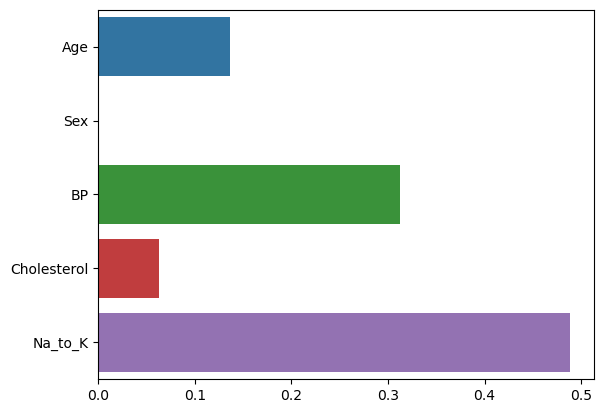

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=drug_df.drop(columns=['Drug']).columns)
plt.show()

In [21]:
drug_df['Drug'].values

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugC', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugB', 'drugX', 'drugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'drugY', 'drugB',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugY', 'drugB', 'drugC',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugA', 'drugY',
       'drugX', 'drugB', 'drugY', 'drugA', 'drugX', 'drugY', 'drugY',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugX', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugC', 'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'dru

In [22]:
# 'Cholesterol' 열을 변환
drug_mapping = {'drugA': 1, 'drugB': 2,'drugC': 3,'drugX': 4,'drugY': 5,}
drug_df['Drug'] = drug_df['Drug'].map(drug_mapping)

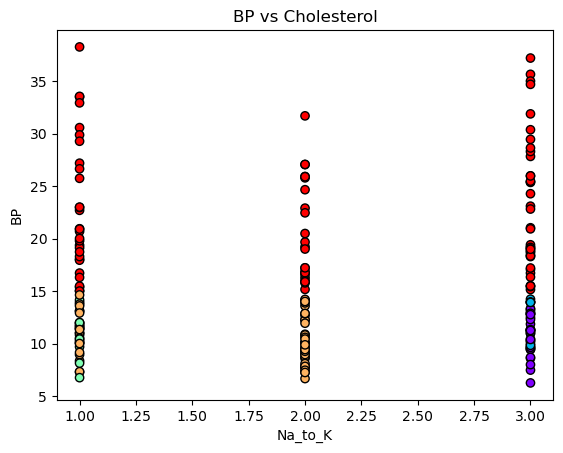

In [23]:
features, targets = drug_df.drop(columns=['Drug']).values, drug_df['Drug'].values

plt.scatter(features[:, 2], features[:, -1], c=targets, edgecolors='k', cmap='rainbow')
plt.xlabel('Na_to_K')
plt.ylabel('BP')
plt.title('BP vs Cholesterol')
plt.show()

In [24]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

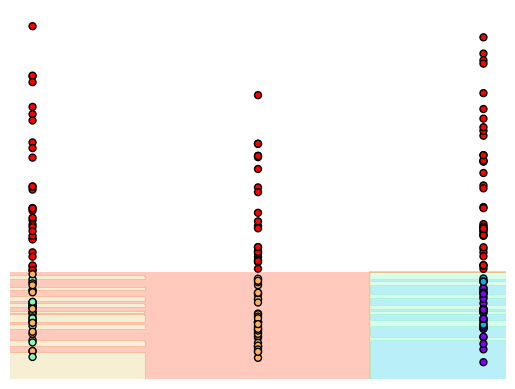

In [25]:
features, targets = drug_df.drop(columns=['Drug']).values[:,[2,-1]], drug_df['Drug'].values
dtc = DecisionTreeClassifier(random_state=3)
dtc.fit(features,targets)

visualize_boundary(dtc, features, targets)

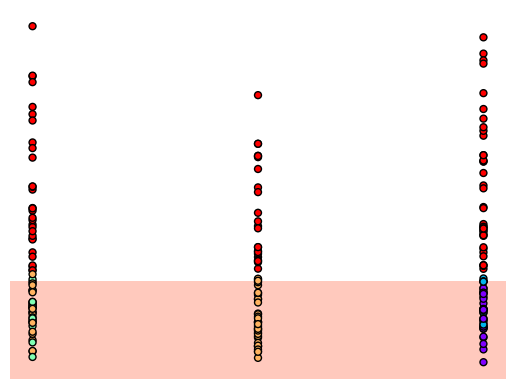

In [26]:
features, targets = drug_df.drop(columns=['Drug']).values[:,[2,-1]], drug_df['Drug'].values
dtc = DecisionTreeClassifier(random_state=3, min_samples_leaf= 100)
dtc.fit(features,targets)

visualize_boundary(dtc, features, targets)